---
layout: default
title: "Deep Learning - Optimization - Mini batch"
categories: deeplearning
permalink: /ML29/
order: 29
comments: true
---

In [2]:
%pylab --no-import-all inline
from plot_ann import ann

Populating the interactive namespace from numpy and matplotlib


# Mini-batch gradient descent

When training a deep-learning model, you training set might very large and slow down your training. In order to prevent this problem what is usually done is to split your training set in **mini-batches**. For example you might split a 5000000 examples training set in 1000 mini-batches ($t$) of 5000 training examples each. You would have 1000 feature vectors $X^{\{t\}}, Y^{\{t\}}$.

From here you would proceed by iterating over your 1000 mini-batches in each training epoch. Below you can see some pseudocode representing the process, where I focus on epoch and mini-batches and remain less rigorous on layers:

```python
for epoch in range(n_iterations):
    for t in range(n_minibatches):
        a = forward_prop(w, x[t], b)
        J[t] = compute_cost(a, y[t])
        dw = backprop(x[t], y[t])
        w := update_weigths(dw)
```

Whereas in batches you expect the value of the cost function $J$ to monotonically decrease with the number of iterations and if this doesn't happen is a signal of some error in the implementation of gradient descent, in mini-batch gradient descent for each $t$ we could have a local increase or decrease f $J$, depending on how hard the examples in the mini-batch are. There should still be a trend down at the increase of $t$ (<a href="#fig:minibatchcost">figure below</a>).

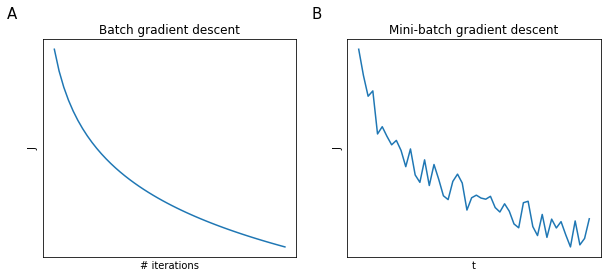

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axes
x = np.linspace(.05, 1)
y = -np.log(x)
ax1.plot(x, y)
ax1.set_title('Batch gradient descent')
ax1.set_xlabel('# iterations')

ax2.plot(x, y/2 + (np.random.rand(*x.shape)-.5)*.3)
ax2.set_title('Mini-batch gradient descent')
ax2.set_xlabel('t')

for ax, l in zip(axes, 'AB'):
    ax.text(-0.1, 1.15, l, transform=ax.transAxes,
      fontsize=15, va='top', ha='right')

    ax.set_ylabel('J')
    ax.set_yticks([])
    ax.set_xticks([])
    

<i id="fig:minibatchcost">The value of J over many epochs in batch gradient descent (A) and over many mini-batches (B)</i>

## Size of mini-batch

The size of the mini-batch ($m_b$) is an hyperparameter that you will need to chose. 

* If  $m_b=m$ we have classic batch gradient descent where $(X^{\{1\}}, Y^{\{1\}}) = (X, Y)$. Batch gradient descent will bring our cost function steadily towards the minimum and to convergence.

* If $m_b=1$ we have an algorithm called stochastic gradient descent where every example is its own mini-batch $(X^{\{1\}}, Y^{\{1\}}) = (x^{(1)}, y^{(1)})$. Stochastic gradient descent will bring **on average** our cost function towards the minimum but with many detours and will never converge.

* In practice $1 < m_b < m$. This will ensure the fastest learning. Typical mini-batches sizes are power of 2, that tend to run faster due to computer architectural implementations. Usually these sizes are used: $64, 128, 256, 512$.